In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

C:\Education\AI\Semantic-book-recommender\langchain-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\chitr\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [2]:
%config Completer.use_jedi = True

In [3]:
import sys
print(sys.executable)

C:\Education\AI\Semantic-book-recommender\langchain-env\Scripts\python.exe


In [4]:
import pandas as pd
from pathlib import Path
books = pd.read_csv(f"{path}/books.csv")

In [5]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

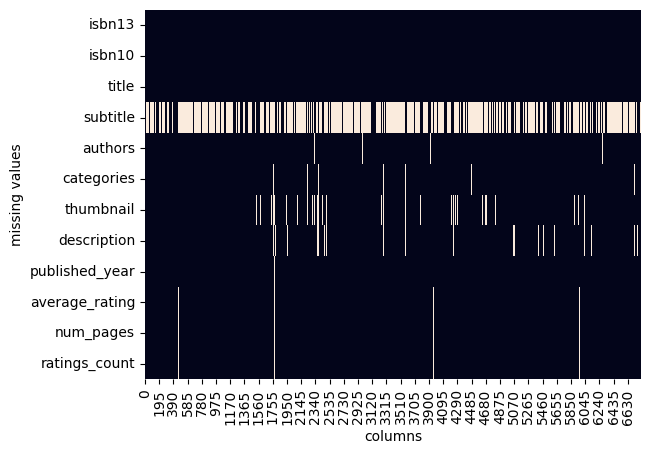

In [7]:
#  Get chart for analysis of columns with missing values to reduce bias in future
ax = plt.axes()
sns.heatmap(books.isna().transpose(),cbar=False,ax=ax)

plt.xlabel('columns')
plt.ylabel('missing values')
plt.show()

In [8]:
# Numeric representation of books that are missing
import numpy as np
books['missing_description'] = np.where(books['description'].isna(),1,0)
books['age_of_books'] = 2024 - books['published_year']


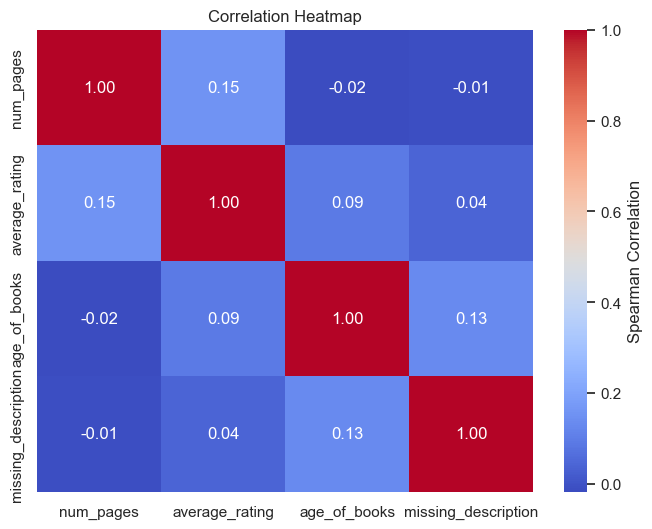

In [9]:
column_of_interes = ["num_pages", "average_rating", "age_of_books","missing_description"]

# using 'spearman' for correlation as it is better for getting corr for non-continuous values. For continuous we can use 'pearsons'
correlation_matrix = books[column_of_interes].corr(method="spearman")
sns.set_theme(style='white')
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label":"Spearman Correlation"})

heatmap.set_title('Correlation Heatmap')
plt.show()

In [10]:
# Getting rid of few categories as the data is missing and as these categories does not have strong correlation they won't affect our recommender
missing_books = books[~(books['num_pages'].isna())
  & ~(books['description'].isna())
  & ~(books['average_rating'].isna())
  & ~(books['published_year'].isna())
    ]


In [11]:
missing_books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0


In [12]:
# Getting the most popular categories 
missing_books['categories'].value_counts().reset_index().sort_values('count',ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
526,Courage,1
527,Otherland (Imaginary place),1
528,Animals,1
529,Children of divorced parents,1


In [13]:
# We have long tail problem with the categories so we need to find out how to normalize this so that the results are not skewed
# Removing short description column as it is unnecessary
missing_books = missing_books.copy()
missing_books["words_in_description"]=missing_books["description"].str.split().str.len()

In [14]:
# now we need to figure out how many words does the description needs to have in order to be meaningful for recommender
# Creating bins for the "words_in_description"
missing_books.loc[missing_books["words_in_description"].between(1,4),"description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [15]:
missing_books.loc[missing_books["words_in_description"].between(25,24),"description"]

Series([], Name: description, dtype: object)

In [16]:
books_missing_25_words = missing_books[missing_books["words_in_description"] >= 25]

In [17]:
books_missing_25_words = missing_books[missing_books["words_in_description"] >= 25].copy()
books_missing_25_words["title_and_subtitle"] =(
    np.where(books_missing_25_words["subtitle"].isna(),books_missing_25_words["title"],
             books_missing_25_words[["title","subtitle"]].astype(str).agg(": ".join, axis=1))
)

In [18]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [19]:
# Creating a new description column that adds a unique description to the data
# we've created this because when we're going to query based on description we want to return the name of the book and ISBN act a unique identifier so we add to it
books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join, axis=1)

In [20]:
books_missing_25_words["tagged_description"]

0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
3       9780006178736 A memorable, mesmerizing heroine...
4       9780006280897 Lewis' work on the nature of lov...
5       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
6802    9788172235222 On A Train Journey Home To North...
6803    9788173031014 This book tells the tale of a ma...
6804    9788179921623 Wisdom to Create a Life of Passi...
6805    9788185300535 This collection of the timeless ...
6808    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5197, dtype: object

In [21]:
# Saving cleaned data
(
books_missing_25_words.drop(["subtitle","missing_description","age_of_books","words_in_description"],axis=1).to_csv("books_cleaned.csv",index=False)    
)


In [22]:
# Lang Chain
# from langchain_community.document_loaders import TextLoader
# from langchain_text_splitters import CharacterTextSplitter
# from langchain_openai import OpenAIEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_core.documents import Document
# Vector Database
from langchain_chroma import Chroma

embeddings = HuggingFaceEmbeddings(
    model_name="all-MiniLM-L6-v2"
)


C:\Users\chitr\AppData\Local\Temp\ipykernel_43568\1628940426.py:10: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(


In [23]:
import pandas as pd
books = pd.read_csv("books_cleaned.csv")

In [24]:
books["tagged_description"].to_csv("tagged_description.txt", sep='\n', index=False, header=False)

In [25]:
# 
# raw_document = TextLoader("tagged_description.txt",encoding="utf-8").load()
# text_splitter = CharacterTextSplitter(chunk_size=1_000_000, chunk_overlap=0, separator='\n')
# documents = text_splitter.split_documents(raw_document)

# Create documents (ONE BOOK = ONE DOCUMENT)
documents = [
    Document(
        page_content=row["tagged_description"],
        metadata={"index": i}
    )
    for i, row in books.iterrows()
    if isinstance(row["tagged_description"], str)
]

In [26]:
documents[0]

Document(metadata={'index': 0}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebr

In [27]:
db_books = Chroma.from_documents(documents, embedding=embeddings)

In [28]:
query = "A book to teach children about nature"
docs=db_books.similarity_search(query=query,k=10)
docs

[Document(id='22fa9fe7-b171-4a0d-8e10-280239f3a69e', metadata={'index': 3747}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(id='51a838b8-8d66-447c-b68f-d286952c4219', metadata={'index': 3749}, page_content="9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from simple child's drawings and abstract art to playful photos. A brief text accompanies each image, introducing the baby to some basic -- and sometimes playful -- information about the subjects."),
 Document(id='86c625cf-8dc3-43f6-abde-0c44124a7638', metadata={'index': 3750}, page_content="9780786808397 Introduce

In [29]:
books[books["isbn13"] == int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...


In [30]:
def retrieve_semantic_recommendations(
    query:str,
    top_k:int=10
) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k =50)

    books_lists = []

    for i in range(0,len(recs)):
        books_lists += [int(recs[i].page_content.strip('"').split()[0])]

    return books[books["isbn13"].isin(books_lists)].head(top_k)

In [31]:
retrieve_semantic_recommendations("A book to teach children about nature")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
59,9780007151240,0007151241,The Family Way,Tony Parsons,Parenthood,http://books.google.com/books/content?id=dJEIx...,It should be the most natural thing in the wor...,2005.0,3.51,400.0,2095.0,The Family Way,9780007151240 It should be the most natural th...
324,9780060959036,0060959037,Prodigal Summer,Barbara Kingsolver,Fiction,http://books.google.com/books/content?id=06IwG...,Barbara Kingsolver's fifth novel is a hymn to ...,2001.0,4.00,444.0,85440.0,Prodigal Summer: A Novel,9780060959036 Barbara Kingsolver's fifth novel...
334,9780060976118,006097611X,Operation Wandering Soul,Richard Powers,Fiction,http://books.google.com/books/content?id=nIGIm...,"Highly imaginative and emotionally powerful, t...",1994.0,3.62,352.0,366.0,Operation Wandering Soul,9780060976118 Highly imaginative and emotional...
383,9780061144899,0061144894,When the Heart Waits,Sue Monk Kidd,Religion,http://books.google.com/books/content?id=JlP91...,From the Bestselling Author of The Secret Life...,2006.0,4.17,240.0,2141.0,When the Heart Waits: Spiritual Direction for ...,9780061144899 From the Bestselling Author of T...
404,9780064402453,0064402452,Racso and the Rats of NIMH,Jane Leslie Conly,Juvenile Fiction,http://books.google.com/books/content?id=MgoNv...,"‘Racso, a brash and boastful little rodent, is...",1988.0,3.76,288.0,3231.0,Racso and the Rats of NIMH,"9780064402453 ‘Racso, a brash and boastful lit..."
406,9780064403870,0064403874,"R-T, Margaret, and the Rats of NIMH",Jane Leslie Conly,Juvenile Fiction,http://books.google.com/books/content?id=WTHHH...,"When Margaret and her younger brother, Artie, ...",1991.0,3.52,272.0,631.0,"R-T, Margaret, and the Rats of NIMH",9780064403870 When Margaret and her younger br...
407,9780064404419,0064404412,The Rainbow People,Laurence Yep,Juvenile Fiction,http://books.google.com/books/content?id=5AHwq...,"""Culled from 69 stories collected in a [1930s]...",1992.0,3.75,208.0,202.0,The Rainbow People,"9780064404419 ""Culled from 69 stories collecte..."
416,9780064406925,006440692X,Winter on the Farm,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=IvlKH...,The Little House books tell the story of a lit...,1997.0,4.13,32.0,400.0,Winter on the Farm,9780064406925 The Little House books tell the ...
427,9780064434874,0064434877,Christmas in the Big Woods,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=FT1Yp...,"Long ago, a little girl named Laura Ingalls li...",1997.0,4.19,32.0,2062.0,Christmas in the Big Woods,"9780064434874 Long ago, a little girl named La..."
429,9780064434980,0064434982,The Deer in the Wood,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=V7YDW...,Even the youngest child can enjoy a special ad...,1999.0,4.17,32.0,302.0,The Deer in the Wood,9780064434980 Even the youngest child can enjo...


In [32]:
#  Implementing Zero-shot text classification with LLMs to reduce categories

category_mapping = {'Fiction' : "Fiction",
 'Juvenile Fiction': "Children's Fiction",
 'Biography & Autobiography': "Nonfiction",
 'History': "Nonfiction",
 'Literary Criticism': "Nonfiction",
 'Philosophy': "Nonfiction",
 'Religion': "Nonfiction",
 'Comics & Graphic Novels': "Fiction",
 'Drama': "Fiction",
 'Juvenile Nonfiction': "Children's Nonfiction",
 'Science': "Nonfiction",
 'Poetry': "Fiction"}

books["simple_categories"] = books["categories"].map(category_mapping)

In [34]:
from transformers import pipeline
fiction_categories = ["Fiction", "Nonfiction"]

pipe = pipeline("zero-shot-classification",
                model="facebook/bart-large-mnli",
                device=0)

Device set to use cuda:0


In [35]:
sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[0]

In [36]:
pipe(sequence, fiction_categories)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [37]:
import numpy as np

max_index = np.argmax(pipe(sequence, fiction_categories)['scores'])
max_label = pipe(sequence, fiction_categories)['labels'][max_index]
max_label

'Fiction'

In [38]:
def generate_predictions(sequence,categories):
    pipe(sequence, fiction_categories)
    max_index = np.argmax(pipe(sequence, fiction_categories)['scores'])
    max_label = pipe(sequence, fiction_categories)['labels'][max_index]
    return max_label
    

In [39]:
# Checking accuracy of the one shot

from tqdm import tqdm

actual_cats =[]
predicted_cats =[]

for i in tqdm(range(0,300)):
    sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence,fiction_categories)]
    actual_cats += ['Fiction']

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [01:17<00:00,  3.86it/s]


In [40]:
for i in tqdm(range(0,300)):
    sequence = books.loc[books["simple_categories"] == "Nonfiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence,fiction_categories)]
    actual_cats += ['Nonfiction']

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [01:21<00:00,  3.69it/s]


In [41]:
predictions_df = pd.DataFrame({"actual_categories": actual_cats, "predicted_categories": predicted_cats})

In [42]:
predictions_df

,actual_categories,predicted_categories
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Nonfiction
4,Fiction,Fiction
...,...,...
595,Nonfiction,Nonfiction
596,Nonfiction,Fiction
597,Nonfiction,Nonfiction
598,Nonfiction,Nonfiction


In [44]:
predictions_df["correct_prediction"] = (
    np.where(predictions_df["actual_categories"] == predictions_df["predicted_categories"], 1, 0)
)

In [45]:
predictions_df["correct_prediction"].sum() / len(predictions_df)

np.float64(0.7783333333333333)

In [47]:
# Getting data where categories are missing
isbns=[]
predicted_cats=[]

missing_cats = books.loc[books["simple_categories"].isna(), ["isbn13", "description"]].reset_index(drop=True)

In [50]:
for i in tqdm(range(0,len(missing_cats))):
    sequence = missing_cats["description"][i]
    predicted_cats += [generate_predictions(sequence,fiction_categories)]
    isbns += [missing_cats["isbn13"][i]]
    

100%|██████████████████████████████████████████████████████████████████████████████| 1454/1454 [06:29<00:00,  3.73it/s]


In [51]:
missin_predictions_df = pd.DataFrame({"isbn13": isbns, "predicted_categories": predicted_cats})

In [52]:
missin_predictions_df

,isbn13,predicted_categories
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1449,9788125026600,Nonfiction
1450,9788171565641,Fiction
1451,9788172235222,Fiction
1452,9788173031014,Nonfiction


In [53]:
books = pd.merge(books,missin_predictions_df, on="isbn13",how="left")
books["simple_categories"] = np.where(books["simple_categories"].isna(), books["predicted_categories"], books["simple_categories"])
books = books.drop(columns = ["predicted_categories"])

In [54]:
books.to_csv("books_with_categories.csv",index=False)